In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv',
                index_col = 'date',
                parse_dates = ['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
df = df[(df['value'] < df['value'].quantile(0.975)) & (df['value'] > df['value'].quantile(0.025))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

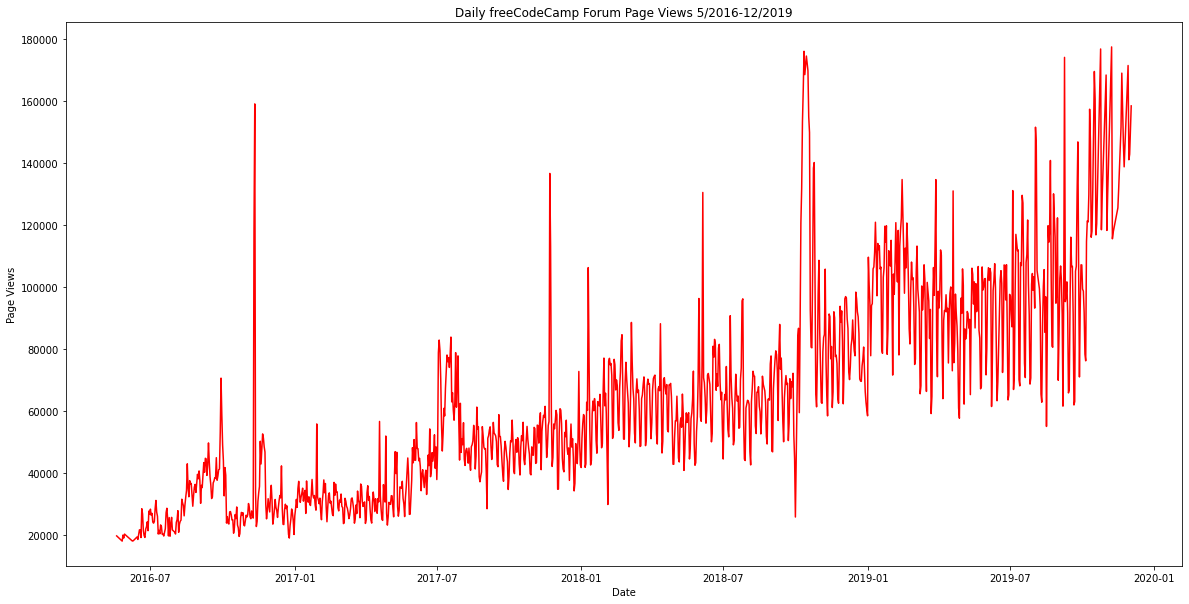

<Figure size 432x288 with 0 Axes>

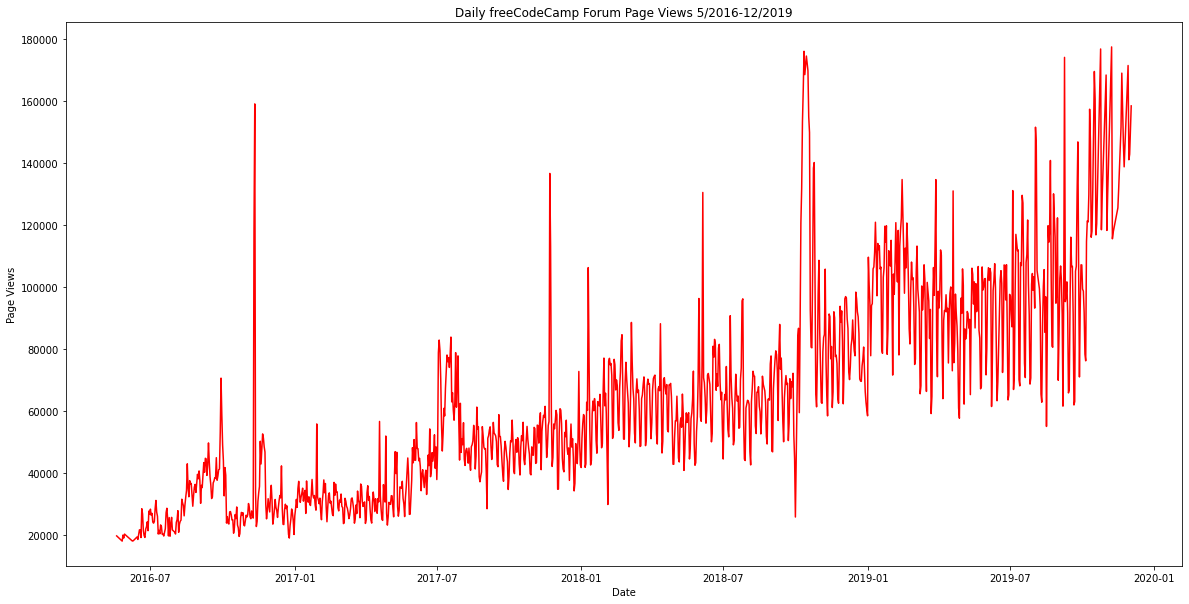

In [4]:
def draw_line_plot():
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(df, color = 'r')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [16]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

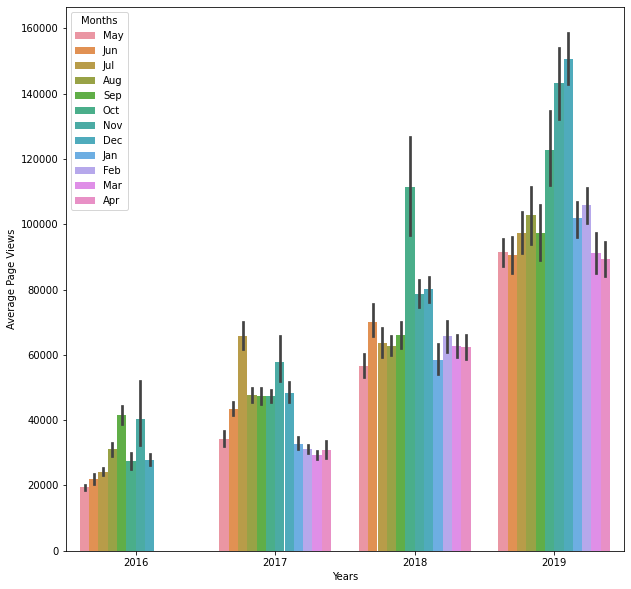

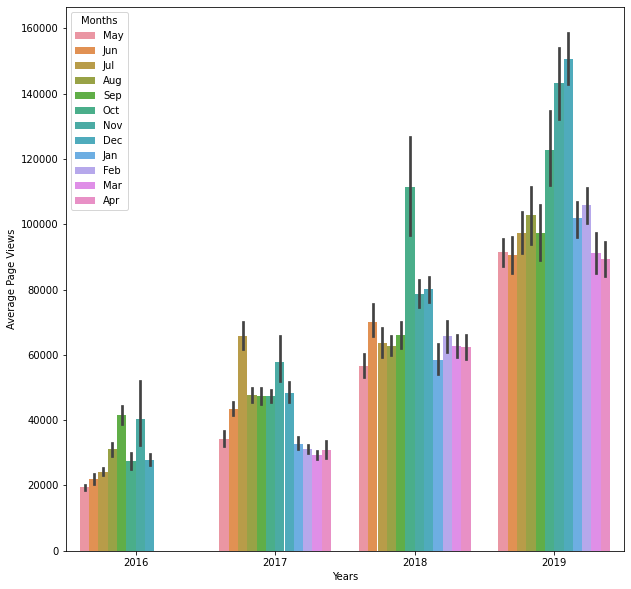

In [17]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bor = df.copy()
    df_bor.reset_index(inplace=True)
    df_bor['year'] = [d.year for d in df_bor.date]
    df_bor['month'] = [d.strftime('%b') for d in df_bor.date]

    # Draw bar plot
    fig, ax = plt.subplots(1, figsize=(10, 10))
    sns.barplot(data = df_bor, x='year', y='value', hue ='month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(loc=2, title='Months')
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

In [18]:
df_bar = df.copy().reset_index()
df_bar['year'] = df_bar['date'].dt.year
df_bar['month'] = df_bar['date'].dt.month_name()
df_bar

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,November
1234,2019-11-29,171584,2019,November
1235,2019-11-30,141161,2019,November
1236,2019-12-01,142918,2019,December


In [19]:
df_bar_group = df_bar.groupby(['year','month'])['value'].mean().reset_index()
df_bar_group

,year,month,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000
5,2016,November,40448.633333
6,2016,October,27398.322581
7,2016,September,41476.866667
8,2017,April,30878.733333
9,2017,August,47712.451613


* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

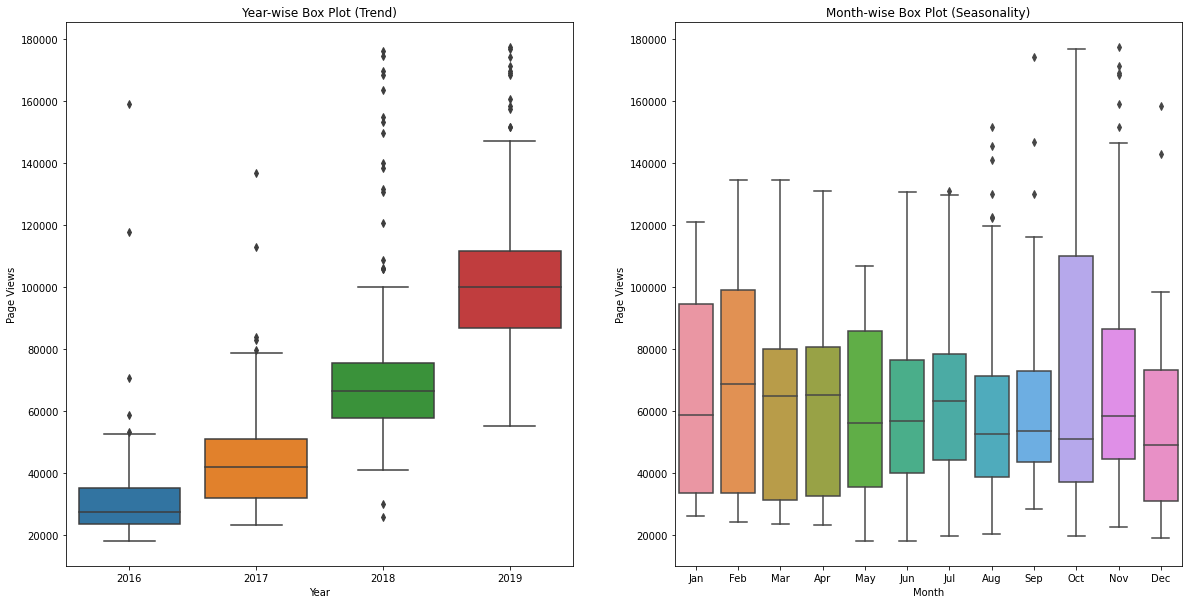

In [20]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().reset_index()
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
     # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1,2, figsize = (20,10))
    
    sns.boxplot(data = df_box, x = 'year', y = 'value', ax = ax[0])
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')
    
    sns.boxplot(data = df_box, x = 'month', y = 'value', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax = ax[1])
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')
draw_box_plot()

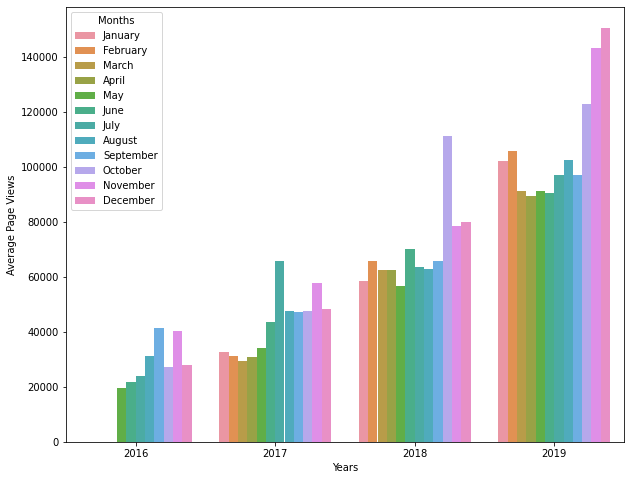

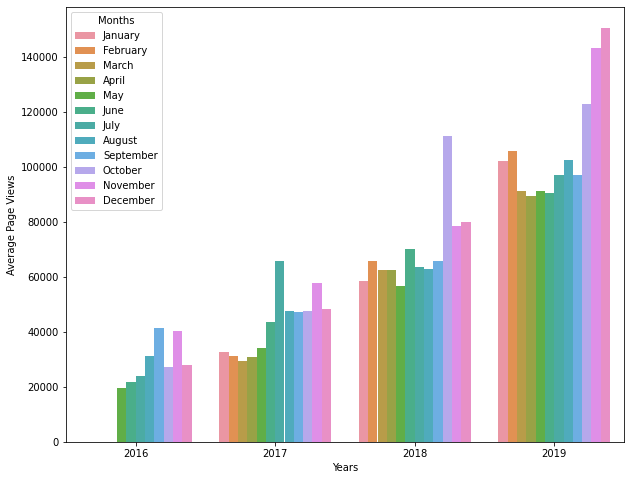

In [23]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy().reset_index()
    df_bar['year'] = df_bar['date'].dt.year
    df_bar['month'] = df_bar['date'].dt.month_name()
    df_bar_group = df_bar.groupby(['year','month'])['value'].mean().reset_index()
    
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    # Draw bar plot
    
    fig, ax = plt.subplots(1, figsize=(10, 8))
    sns.barplot(data=df_bar_group, x='year', y='value', hue='month', hue_order = months)
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(loc=2, title='Months')
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()